# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

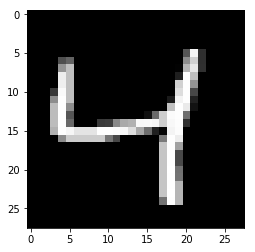

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
mnist.train.images.shape[1]

784

In [9]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=(None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, shape=(None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='outputs')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [10]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [11]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6941
Epoch: 1/20... Training loss: 0.6911
Epoch: 1/20... Training loss: 0.6883
Epoch: 1/20... Training loss: 0.6853
Epoch: 1/20... Training loss: 0.6819
Epoch: 1/20... Training loss: 0.6772
Epoch: 1/20... Training loss: 0.6713
Epoch: 1/20... Training loss: 0.6651
Epoch: 1/20... Training loss: 0.6570
Epoch: 1/20... Training loss: 0.6476
Epoch: 1/20... Training loss: 0.6362
Epoch: 1/20... Training loss: 0.6237
Epoch: 1/20... Training loss: 0.6120
Epoch: 1/20... Training loss: 0.5969
Epoch: 1/20... Training loss: 0.5792
Epoch: 1/20... Training loss: 0.5626
Epoch: 1/20... Training loss: 0.5439
Epoch: 1/20... Training loss: 0.5260
Epoch: 1/20... Training loss: 0.5053
Epoch: 1/20... Training loss: 0.4881
Epoch: 1/20... Training loss: 0.4701
Epoch: 1/20... Training loss: 0.4478
Epoch: 1/20... Training loss: 0.4352
Epoch: 1/20... Training loss: 0.4217
Epoch: 1/20... Training loss: 0.4058
Epoch: 1/20... Training loss: 0.3911
Epoch: 1/20... Training loss: 0.3747
E

Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1842
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1838
Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1843
Epoch: 1/20... Training loss: 0.1837
Epoch: 1/20... Training loss: 0.1817
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1815
Epoch: 1/20... Training loss: 0.1851
Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1826
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1809
Epoch: 1/20... Training loss: 0.1772
Epoch: 1/20... Training loss: 0.1834
Epoch: 1/20... Training loss: 0.1783
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1836
Epoch: 1/20... Training loss: 0.1778
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1840
E

Epoch: 2/20... Training loss: 0.1602
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1486
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1506
Epoch: 2/20... Training loss: 0.1506
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1526
E

Epoch: 3/20... Training loss: 0.1280
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1295
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1231
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1304
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1280
Epoch: 3/20... Training loss: 0.1316
E

Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1229
E

Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1164
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1080
E

Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1053
Epoch: 5/20... Training loss: 0.1042
Epoch: 5/20... Training loss: 0.1054
Epoch: 5/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1119
Epoch: 6/20... Training loss: 0.1055
E

Epoch: 6/20... Training loss: 0.0996
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1113
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1012
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.0997
Epoch: 6/20... Training loss: 0.1014
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.0997
E

Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.0954
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0968
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0999
E

Epoch: 8/20... Training loss: 0.1025
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0937
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0985
E

Epoch: 9/20... Training loss: 0.0915
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.1002
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0976
E

Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0907
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0910
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0991
Epoch: 11/20... Training loss: 0.0905
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0896
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0978
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0895
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0881
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0896
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0898
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0983
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0890
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0992
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0884
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0892
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0883
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

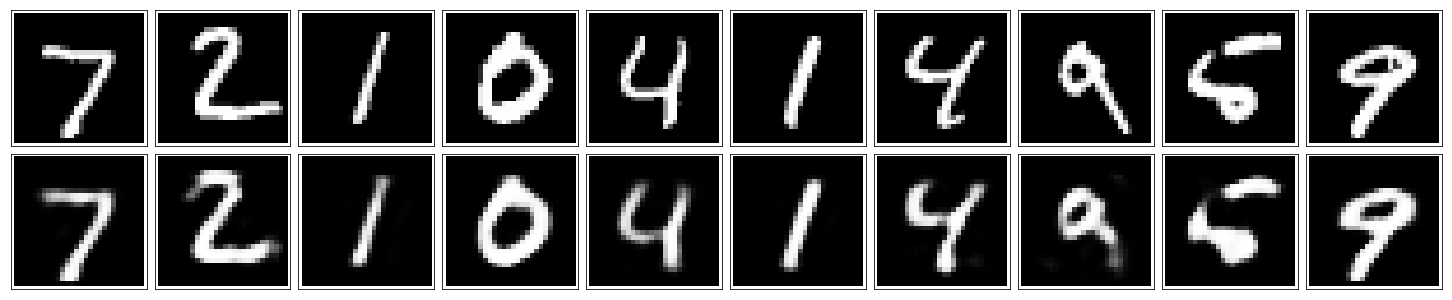

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [14]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.